# 1. Define Business Requirement

## Problem Statement
Title: Stock Price Prediction Based on Macroeconomic Factors

## Challenge:
How does changes in macroeconomic factors, like interest rates and inflation, affect the stock market development, and how can we predict these changes using historical data?

## Importance:
Macroeconomic changes have a direct impact on companies' borrowing costs and earnings, which in turn affect their stock prices. Being able to predict these changes can help investors make informed decisions and reduce market risks.

## Expected Solution:
This study will help us determine if the macroeconomic factors have a influence on the stock prices, and whether investors should invest or not, based macroecomomic factors.

We will work towards developing a machine learning model that predicts stock price changes based on historical macroeconomic factors. In this study we mainly focus on interest rate and inflation.



# 2. Data Collection

We will first retrieve the data we will be working with. Before we can begin we have to import the neccesary libraries

In [4]:
# importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
# retrieving data

df_gold = pd.read_csv('https://raw.githubusercontent.com/badranyoussef/bi-exam-project-stock/refs/heads/main/datasets/cleaned_gold_data.csv')
df_interest_inflation = pd.read_csv('https://raw.githubusercontent.com/badranyoussef/bi-exam-project-stock/main/datasets/fed_interest_rate_inflation.csv')
# ------- START YOUSSEF --------
# df_interest_2017_to_now = pd.read_excel('/Users/youssefbadran/Documents/GitHub/bi-exam-project-stock/datasets/interest_rate_2017_now_cleaned.xlsx')
# df_sp500 = pd.read_csv('/Users/youssefbadran/Documents/datamatiker/4. semester/BI/sp500_data.csv')
# ------- END YOUSSEF --------
# ------- START LASSE ----------
df_interest_2017_to_now = pd.read_excel('/Users/lassekh/Documents/Datamatiker/4-semester/BI - Business Intelligence/bi-exam-project-stock/datasets/interest_rate_2017_now_cleaned.xlsx')
# Reading from split csv files and define arr with csv file names from directory
#dir = '/Users/lassekh/Documents/Datamatiker/4-semester/BI - Business Intelligence/bi-exam-project-stock/datasets/not in use/sp500/'
#csv_files = [f'{dir}part_{i}.csv' for i in range(1, 26)]
# load all csv-files into a data frame
#dfs = [pd.read_csv(file) for file in csv_files]
# combine all DFs in one
df_sp500 = pd.read_csv('/Users/lassekh/Documents/Datamatiker/4-semester/BI - Business Intelligence/shortxprice/datasets/sp500_data.csv')
# ------ END LASSE ---------
russell2000_df = pd.read_csv('https://raw.githubusercontent.com/badranyoussef/bi-exam-project-stock/refs/heads/main/datasets/russell_2000.csv')
oil_df = pd.read_csv('https://raw.githubusercontent.com/badranyoussef/bi-exam-project-stock/refs/heads/main/datasets/BrentOilPrices.csv')
cpi = pd.read_csv('https://raw.githubusercontent.com/badranyoussef/bi-exam-project-stock/refs/heads/main/datasets/cpi_data.csv')


# 3. Cleaning data
Now that we have all the data needed, we will look the through to ensure that there are no missing values. In case values are missing we will fill in missing values depending on the variable/feature

in all stock datasets We will remove all columns unless the close values and date

As sp500 contains several stocks listed after each other we have a couple of million rows. Therefor we will work with the mean of the close of each stock based on date

### SP500

In [67]:

df_sp500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4239723 entries, 0 to 4239722
Data columns (total 8 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Date       object 
 1   Open       float64
 2   High       float64
 3   Low        float64
 4   Close      float64
 5   Adj Close  float64
 6   Volume     float64
 7   Ticker     object 
dtypes: float64(6), object(2)
memory usage: 258.8+ MB


In [68]:
# Converting Date column to DateTime format
df_sp500['Date'] = pd.to_datetime(df_sp500['Date'])

# dropping unnecesery columns
df_sp500 = df_sp500.drop(columns=['Ticker', 'Adj Close'])

# CHANGED TO BELOW -- df_sp500.rename(columns={'Close':'Close SP500'}, inplace=True)
# Renaming every column except 'Date' to append it with SP500
df_sp500.columns = [col + ' SP500' if col != 'Date' else col for col in df_sp500.columns]

# Group by Date and calculate the sum for each column
df_sp500_sum_of_date = df_sp500.groupby('Date').agg({
    'Close SP500': 'sum',
}).reset_index()

# Group by Date and calculate the mean for each column
df_sp500_mean_of_date = df_sp500.groupby('Date').agg({
    'Close SP500': 'mean',
}).reset_index()

In [8]:
#df_sp500_mean_of_ticker.to_csv('df_sp500_cleaned.csv')

### Now looking into Gold

In [69]:
df_gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11604 entries, 0 to 11603
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      11604 non-null  object 
 1   Price     11604 non-null  float64
 2   Open      11604 non-null  float64
 3   High      11604 non-null  float64
 4   Low       11604 non-null  float64
 5   Change %  11604 non-null  float64
dtypes: float64(5), object(1)
memory usage: 544.1+ KB


In [70]:
df_gold['Date'] = pd.to_datetime(df_gold['Date'])

# CHANGED DELETED -- df_gold = df_gold.drop(columns=(['Open', 'High', 'Low', 'Change %']))
#df_gold.columns = [col + ' GOLD' if col != ['Date', 'Change %'] else col for col in df_sp500.columns]

df_gold.rename(columns={'Price':'Close Gold', 'Open':'Open Gold', 'High':'High Gold', 'Low':'Low Gold', 'Change %':'Change % Gold'}, inplace=True)

### Now interest and inflation rates

In [71]:
df_interest_inflation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904 entries, 0 to 903
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Year                          904 non-null    int64  
 1   Month                         904 non-null    int64  
 2   Day                           904 non-null    int64  
 3   Federal Funds Target Rate     462 non-null    float64
 4   Federal Funds Upper Target    103 non-null    float64
 5   Federal Funds Lower Target    103 non-null    float64
 6   Effective Federal Funds Rate  752 non-null    float64
 7   Real GDP (Percent Change)     250 non-null    float64
 8   Unemployment Rate             752 non-null    float64
 9   Inflation Rate                710 non-null    float64
dtypes: float64(7), int64(3)
memory usage: 70.8 KB


In [72]:
# drop all columns we don't need
df_interest_inflation_dropped = df_interest_inflation.drop(columns=['Federal Funds Target Rate', 'Federal Funds Upper Target', 'Federal Funds Lower Target', 'Real GDP (Percent Change)'])

# Combine the columns Year, Month, Day into one DateTime column
df_interest_inflation_dropped['Date'] = pd.to_datetime(df_interest_inflation_dropped[['Year', 'Month', 'Day']])

# Insert the new column at the beginning
df_interest_inflation_dropped.insert(0, 'Date', df_interest_inflation_dropped.pop('Date'))

# Drop Year, Month and Day
df_interest_inflation_dropped = df_interest_inflation_dropped.drop(columns=['Year', 'Month', 'Day'])

# renaming column
df_interest_inflation_dropped.rename(columns={'Effective Federal Funds Rate':'Interest Rate'}, inplace=True)

# filling in the missing values
df_interest_inflation_dropped.ffill(inplace=True)
df_interest_inflation_dropped.bfill(inplace=True)

df_interest_inflation_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904 entries, 0 to 903
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               904 non-null    datetime64[ns]
 1   Interest Rate      904 non-null    float64       
 2   Unemployment Rate  904 non-null    float64       
 3   Inflation Rate     904 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 28.4 KB


In [73]:
df_interest_2017_to_now

,Effective Date,Rate (%)
0,09/16/2024,5.33
1,09/13/2024,5.33
2,09/12/2024,5.33
3,09/11/2024,5.33
4,09/10/2024,5.33
...,...,...
1932,01/09/2017,0.66
1933,01/06/2017,0.66
1934,01/05/2017,0.66
1935,01/04/2017,0.66


In [74]:
# removing all columns unless date and 
# CHANGED UNNESSASARY -- df_interest_2017_to_now1 = df_interest_2017_to_now.filter(items=['Effective Date', 'Rate (%)'])

# Convert the current column with date to a column with datetime data type and drop the 'Effective Date'
df_interest_2017_to_now['Date'] = pd.to_datetime(df_interest_2017_to_now['Effective Date'])
df_interest_2017_to_now = df_interest_2017_to_now.drop(columns=['Effective Date'])

# renaming column
df_interest_2017_to_now.rename(columns={'Rate (%)':'Interest Rate'}, inplace=True)

df_interest_2017_to_now

,Interest Rate,Date
0,5.33,2024-09-16
1,5.33,2024-09-13
2,5.33,2024-09-12
3,5.33,2024-09-11
4,5.33,2024-09-10
...,...,...
1932,0.66,2017-01-09
1933,0.66,2017-01-06
1934,0.66,2017-01-05
1935,0.66,2017-01-04


### combining the two interest datasets
As we have two datasets with interest values we will combine them so we can work with one dataset.

In [75]:
# combining the dataframes with 'Interest Rate'
df_interest_combined = pd.concat([df_interest_inflation_dropped, df_interest_2017_to_now])

# Sorting after 'Date'
df_interest_combined = df_interest_combined.sort_values(by='Date').reset_index(drop=True)

# Removing duplicates of dates if overlaping
df_interest_combined = df_interest_combined.drop_duplicates(subset='Date')

Just to be sure, we will check if we have duplicates of dates. We make a function as we might need it in the future

In [76]:
def check_for_duplicate_dates(df, category):
  duplicate_dates = df[df.duplicated(subset=category)]
  print(duplicate_dates)

In [77]:
check_for_duplicate_dates(df_interest_combined, 'Date')


Empty DataFrame
Columns: [Date, Interest Rate, Unemployment Rate, Inflation Rate]
Index: []


In [78]:
df_interest_combined.to_csv('df_interest_inflation.csv')

### Now lets have a look at Russell Oil and CPI
We will as before ensure the date is the type datetime and again remove unneccecary columns and fill in any missing values

In [79]:
# Dropping columns
russell2000_df = russell2000_df.drop(columns=['Adj Close'])

# converting date to datetime
russell2000_df['Date'] = pd.to_datetime(russell2000_df['Date'])
oil_df['Date'] = pd.to_datetime(oil_df['Date'])
cpi['Date'] = pd.to_datetime(cpi['Date'])

# renaming columns
# CHANGED TO BELOW -- russell2000_df.rename(columns={'Close':'Close Russell'}, inplace=True)
russell2000_df.columns = [col + ' RUSSELL2000' if col != 'Date' else col for col in russell2000_df.columns]
oil_df.rename(columns={'Price':'Close Oil'}, inplace=True)
cpi.rename(columns={'DATE':'Date'}, inplace=True)




/var/folders/17/dk6q659s09b4tj9wzhpz5dpm0000gn/T/ipykernel_45863/261406752.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  oil_df['Date'] = pd.to_datetime(oil_df['Date'])


In [61]:
cpi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751 entries, 0 to 750
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      751 non-null    datetime64[ns]
 1   CPIAUCSL  751 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 11.9 KB


## Now that we have all the data needed, we will combine all data sets into one dataframe

In [102]:
# merging sp500 into interest and inflation df
df_combined = pd.merge(df_sp500_mean_of_date, df_interest_combined, on='Date', how='outer')
# cpi into combined
df_combined = pd.merge(df_combined, cpi, on='Date', how='left')
# russell into combined
df_combined = pd.merge(df_combined, russell2000_df, on='Date', how='outer')
# oil into combined
df_combined = pd.merge(df_combined, oil_df, on='Date', how='left')
# gold into combined
df_combined = pd.merge(df_combined, df_gold, on='Date', how='left')

In [103]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16125 entries, 0 to 16124
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                16125 non-null  datetime64[ns]
 1   Close SP500         15782 non-null  float64       
 2   Interest Rate       2838 non-null   float64       
 3   Unemployment Rate   902 non-null    float64       
 4   Inflation Rate      902 non-null    float64       
 5   CPIAUCSL            722 non-null    float64       
 6   Open RUSSELL2000    8521 non-null   float64       
 7   High RUSSELL2000    8521 non-null   float64       
 8   Low RUSSELL2000     8521 non-null   float64       
 9   Close RUSSELL2000   8521 non-null   float64       
 10  Volume RUSSELL2000  8521 non-null   float64       
 11  Close Oil           8860 non-null   float64       
 12  Close Gold          11287 non-null  float64       
 13  Open Gold           11287 non-null  float64   

In [104]:
#df_combined.sort_values(by='Date')
df_combined.tail(20)

,Date,Close SP500,Interest Rate,Unemployment Rate,Inflation Rate,CPIAUCSL,Open RUSSELL2000,High RUSSELL2000,Low RUSSELL2000,Close RUSSELL2000,Volume RUSSELL2000,Close Oil,Close Gold,Open Gold,High Gold,Low Gold,Change % Gold
16105,2015-03-01,NaN,0.11,5.4,1.8,235.976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16106,2015-08-01,NaN,0.14,5.1,1.8,238.033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16107,2015-11-01,NaN,0.12,5.0,2.0,238.017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16108,2016-01-01,NaN,0.34,4.9,2.2,237.652,NaN,NaN,NaN,NaN,NaN,NaN,1060.74,1061.21,1061.41,1060.74,-0.05
16109,2016-05-01,NaN,0.37,4.7,2.2,239.557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16110,2016-10-01,NaN,0.40,4.8,2.1,241.741,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16111,2017-01-01,NaN,0.65,4.8,2.3,243.618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16112,2017-04-14,NaN,0.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1285.69,1287.35,1288.75,1285.31,-0.16
16113,2018-03-30,NaN,1.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16114,2018-12-05,NaN,2.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.40,1237.56,1238.54,1239.35,1232.96,-0.08


In [22]:
#df_combined.tail(20)
#df_combined.to_csv('all data.csv')

In [23]:
df_filled = df_combined[['Interest Rate','Inflation Rate', 'Close SP500', 'CPIAUCSL', 'Close Russell', 'Close Oil', 'Close Gold']].ffill().bfill()
df_filled['Date'] = df_combined['Date']

In [24]:
df_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16462 entries, 0 to 16461
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Interest Rate   16462 non-null  float64       
 1   Inflation Rate  16462 non-null  float64       
 2   Close SP500     16462 non-null  float64       
 3   CPIAUCSL        16462 non-null  float64       
 4   Close Russell   16462 non-null  float64       
 5   Close Oil       16462 non-null  float64       
 6   Close Gold      16462 non-null  float64       
 7   Date            16462 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(7)
memory usage: 1.0 MB


In [25]:
df_filtered = df_combined[(df_combined['Date'] >= '1987-10-01') & (df_combined['Date'] < '2017-01-01')]

In [26]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7724 entries, 448 to 16440
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            7724 non-null   datetime64[ns]
 1   Interest Rate   452 non-null    float64       
 2   Inflation Rate  452 non-null    float64       
 3   Close SP500     7374 non-null   float64       
 4   CPIAUCSL        351 non-null    float64       
 5   Close Russell   7374 non-null   float64       
 6   Close Oil       7421 non-null   float64       
 7   Close Gold      7611 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 543.1 KB


##### values before filling out data

Index: 7724 entries, 6699 to 14422
Data columns (total 8 columns):
     Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            7724 non-null   datetime64[ns]
 1   Interest Rate   452 non-null    float64       
 2   Inflation Rate  452 non-null    float64       
 3   Close SP500     7374 non-null   float64       
 4   CPIAUCSL        351 non-null    float64       
 5   Close Russell   7374 non-null   float64       
 6   Close Oil       7421 non-null   float64       
 7   Close Gold      7611 non-null   float64       

In [27]:
df_filtered_filled = df_filtered[['Interest Rate','Inflation Rate', 'Close SP500', 'CPIAUCSL', 'Close Russell', 'Close Oil', 'Close Gold']].ffill().bfill()
df_filtered_filled['Date'] = df_filtered['Date']

In [28]:
df_filtered_filled

,Interest Rate,Inflation Rate,Close SP500,CPIAUCSL,Close Russell,Close Oil,Close Gold,Date
448,7.29,4.3,9.130863,115.000,171.399994,18.50,453.46,1987-10-01
449,6.69,4.4,9.130863,115.400,171.399994,18.50,453.46,1987-11-01
450,6.69,4.4,7.000219,115.400,117.199997,17.93,465.85,1987-11-04
451,6.77,4.2,6.568322,115.600,111.269997,17.65,489.96,1987-12-01
452,6.83,4.3,6.568322,116.000,111.269997,17.65,489.96,1988-01-01
...,...,...,...,...,...,...,...,...
16436,0.54,2.2,83.335242,242.637,1357.130005,47.54,355.60,1991-03-29
16437,0.54,2.2,83.335242,242.637,1357.130005,47.54,390.00,1990-12-25
16438,0.54,2.2,83.335242,242.637,1357.130005,47.54,367.50,1990-05-28
16439,0.54,2.2,83.335242,242.637,1357.130005,47.54,375.85,1990-04-13


In [29]:
df_filtered_after1987 = df_combined[(df_combined['Date'] >= '1987-10-01')]

In [30]:
df_filtered_after1987_filled = df_filtered_after1987[['Interest Rate','Inflation Rate', 'Close SP500', 'CPIAUCSL', 'Close Russell', 'Close Oil', 'Close Gold']].ffill().bfill()
df_filtered_after1987_filled['Date'] = df_filtered_after1987['Date']
df_filtered_after1987_filled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9763 entries, 448 to 16440
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Interest Rate   9763 non-null   float64       
 1   Inflation Rate  9763 non-null   float64       
 2   Close SP500     9763 non-null   float64       
 3   CPIAUCSL        9763 non-null   float64       
 4   Close Russell   9763 non-null   float64       
 5   Close Oil       9763 non-null   float64       
 6   Close Gold      9763 non-null   float64       
 7   Date            9763 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(7)
memory usage: 686.5 KB


### we have 2 different dfs one with all rows and filled out missing values and one with filteret data between date 1987 and 2017 and filled data

We did that as the original file had too many missing values. so we want to check which data set can be best for machine learning later on

In [31]:
# saving all cleaned data to csv's
df_filtered_filled.to_csv('data between 1987 and 2017.csv')
df_filled.to_csv('data between 1952 and 2024.csv')
df_filtered_after1987_filled.to_csv('data after 1987.csv')

# 4. Data Exploration & Analysis

So far we have retrieved data and cleaned it. Now we will go through the next step in the process. we will explre the data and analyse it

I will first see all the values in a 

<Axes: xlabel='Date'>

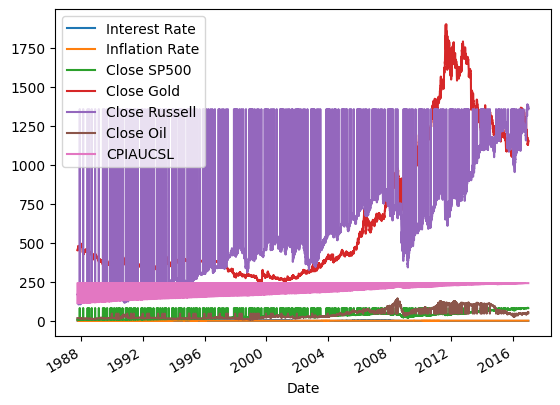

In [32]:
df_filtered_filled.plot.line(y=['Interest Rate', 'Inflation Rate', 'Close SP500', 'Close Gold', 'Close Russell', 'Close Oil', 'CPIAUCSL'] , x='Date')

<Axes: xlabel='Date'>

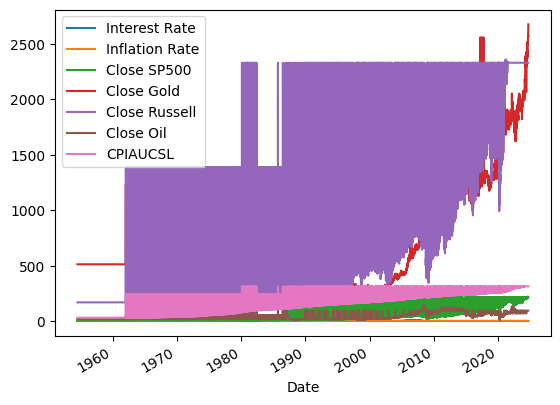

In [33]:
df_filled.plot.line(y=['Interest Rate', 'Inflation Rate', 'Close SP500', 'Close Gold', 'Close Russell', 'Close Oil', 'CPIAUCSL'] , x='Date')


<Axes: xlabel='Date'>

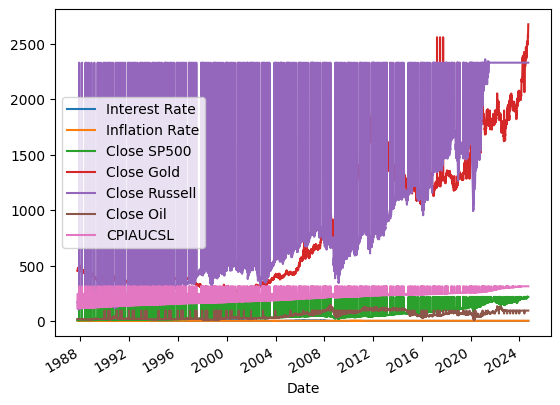

In [34]:
df_filtered_after1987_filled.plot.line(y=['Interest Rate', 'Inflation Rate', 'Close SP500', 'Close Gold', 'Close Russell', 'Close Oil', 'CPIAUCSL'] , x='Date')


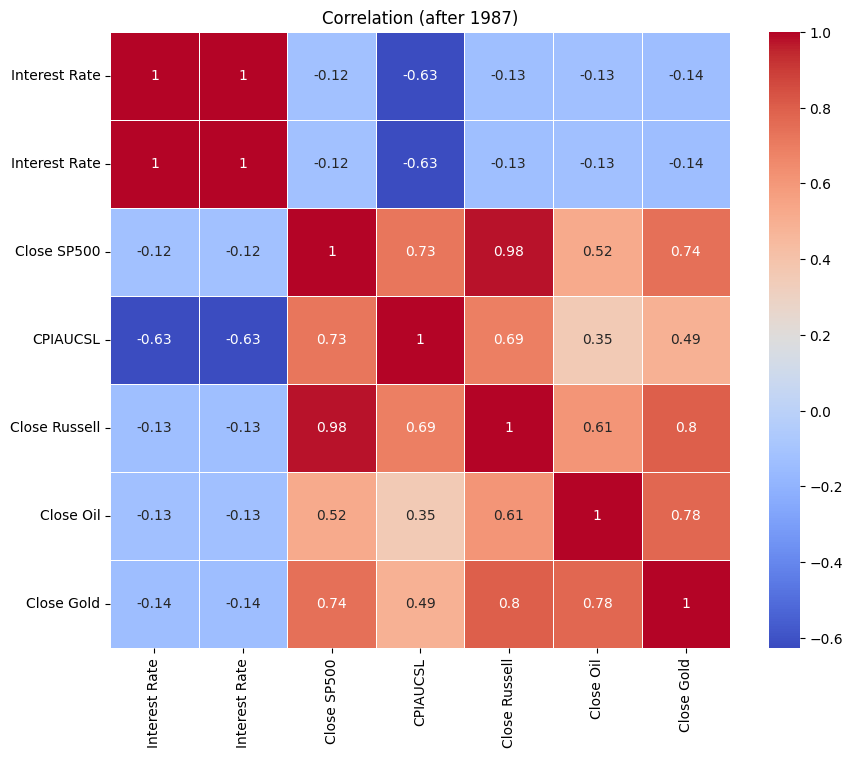

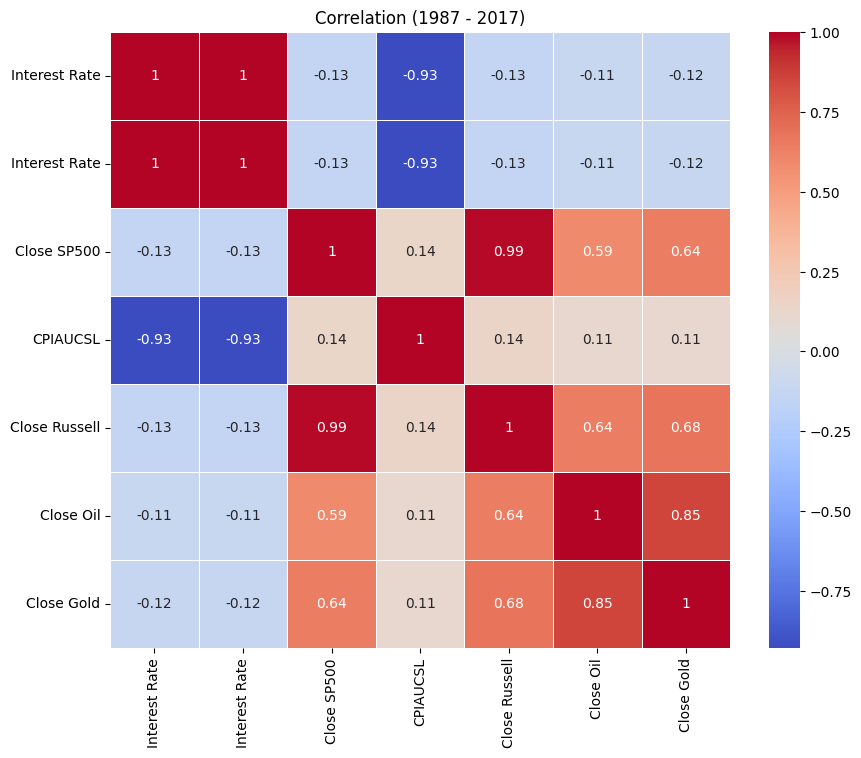

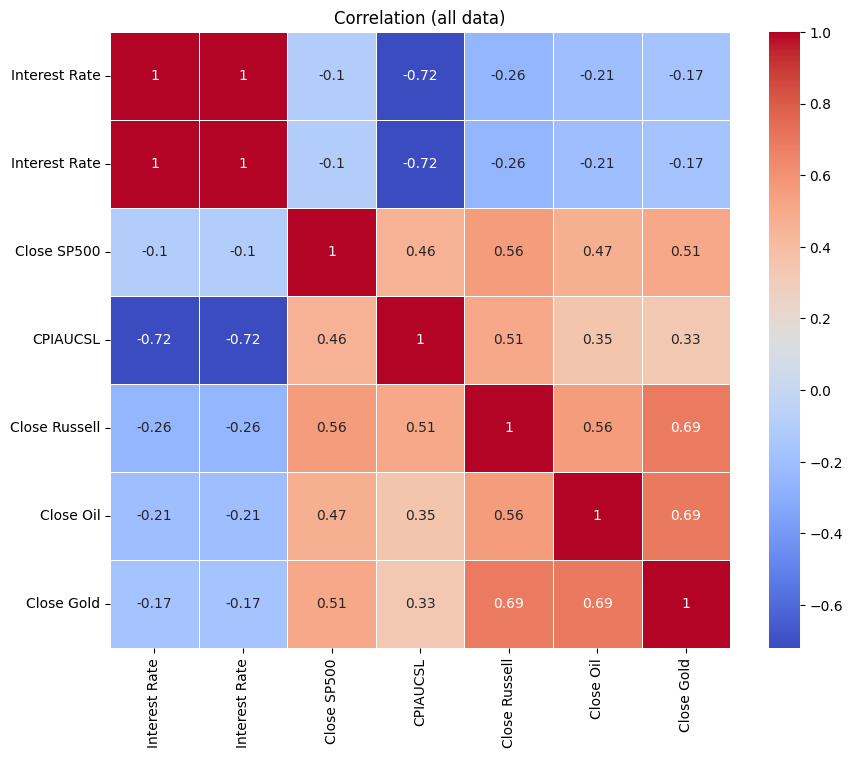

In [35]:
plt.figure(figsize=(10, 8))
corrmatt_after_1987 = df_filtered_after1987_filled[['Interest Rate', 'Interest Rate', 'Close SP500', 'CPIAUCSL', 'Close Russell', 'Close Oil', 'Close Gold']].corr()
sns.heatmap(corrmatt_after_1987, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation (after 1987)')
plt.show()

plt.figure(figsize=(10, 8))
corrmatt_after_1987_till_2017 = df_filtered_filled[['Interest Rate', 'Interest Rate', 'Close SP500', 'CPIAUCSL', 'Close Russell', 'Close Oil', 'Close Gold']].corr()
sns.heatmap(corrmatt_after_1987_till_2017, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation (1987 - 2017)')
plt.show()

plt.figure(figsize=(10, 8))
corrmatt_all_data = df_filled[['Interest Rate', 'Interest Rate', 'Close SP500', 'CPIAUCSL', 'Close Russell', 'Close Oil', 'Close Gold']].corr()
sns.heatmap(corrmatt_all_data, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation (all data)')
plt.show()